# Institutional prestige effects on citations

## The characteristics differences between papers in G1 and G2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
import pandas as pd
import numpy as np
from matplotlib.ticker import AutoMinorLocator

In [2]:
def each_characteristic(characteristic,characteristcs_df):
    palette = ['skyblue', 'steelblue']
    ax = sns.barplot(x='modified', y=characteristic, data=characteristcs_df, palette=palette, capsize=.1,
                     errwidth=1, errcolor="k", saturation=0.5, **{"edgecolor": "k", "linewidth": 1})
    ax.tick_params(which='major', direction='in', length=3, width=1., labelsize=5, bottom=False)
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.grid(axis='y', ls='--', c='lightgray')
    widthbars = [0.5, 0.5]
    for bar, newwidth in zip(ax.patches, widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x + width / 2.
        bar.set_x(centre - newwidth / 2.)
        bar.set_width(newwidth)
    ax.set_axisbelow(True)
    if characteristic == 'PY':
        plt.ylim(2014, 2016.45)
    plt.xticks([])
    plt.xlabel('G2                  G1', fontdict={'weight': 'bold', 'fontsize': 8, 'family': 'Arial'})

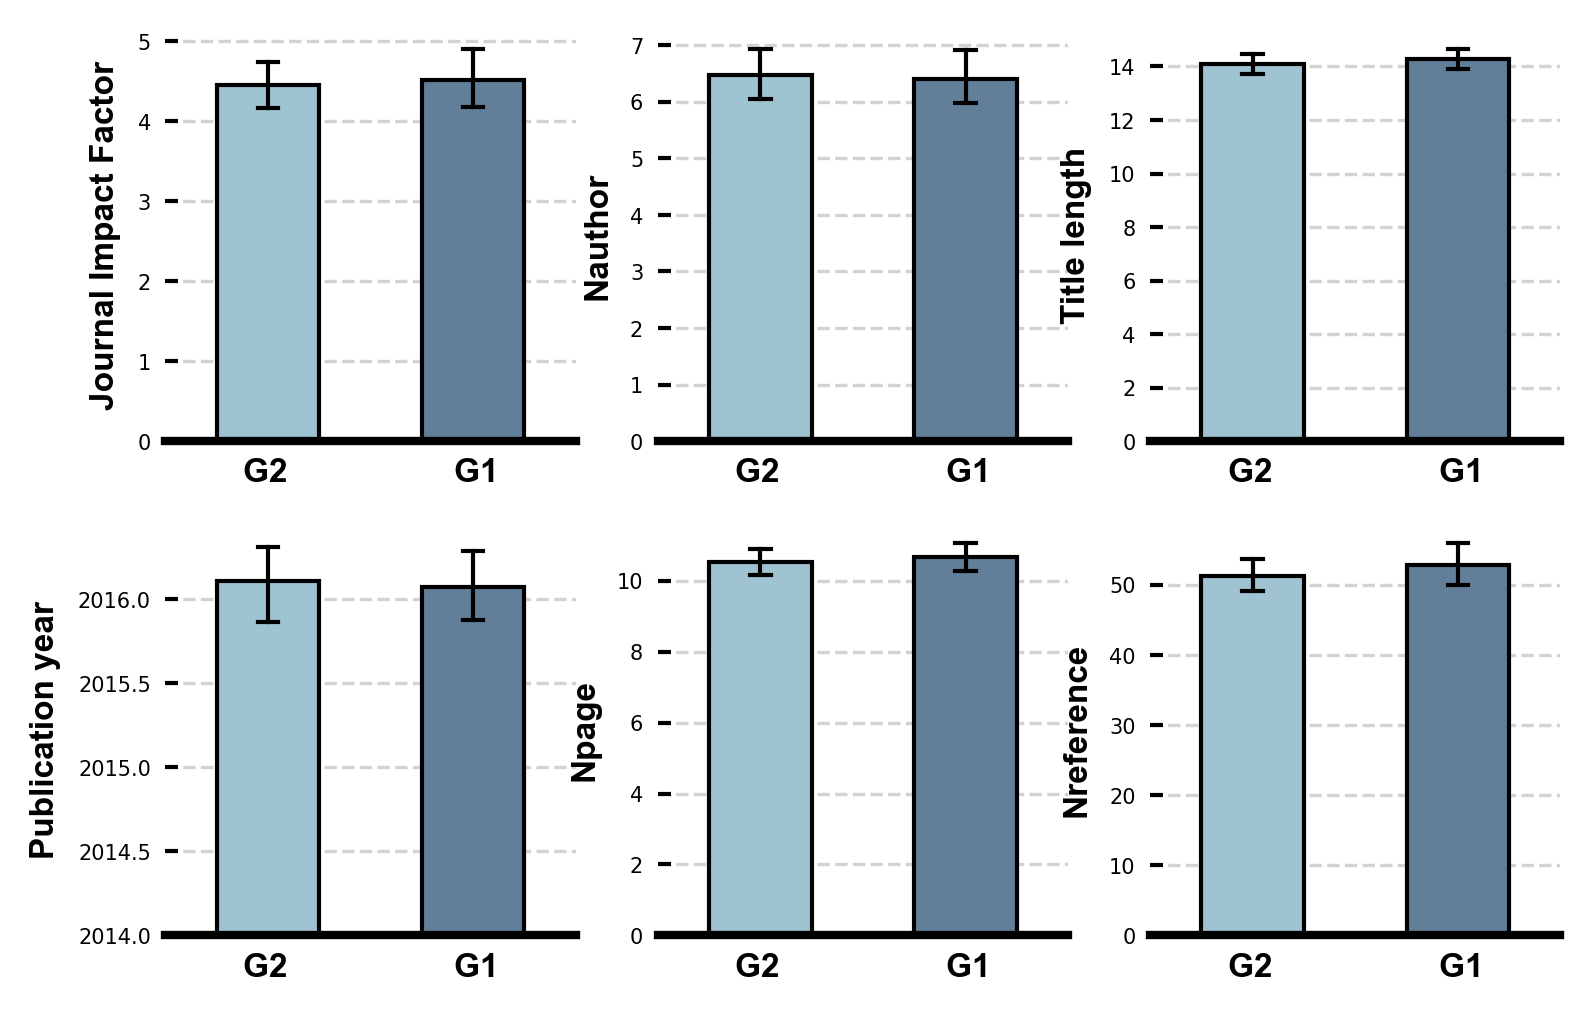

In [3]:
path = r'E:\each_characteristic.csv' # customize your path
characteristcs_df = pd.read_csv(path)
fig, ax = plt.subplots(figsize=(6, 4), dpi=300,facecolor="w")
font_dict={'weight': 'bold', 'fontsize': 8, 'family': 'Arial'}

plt.subplot(231)
each_characteristic('Journal_Impact_Factor',characteristcs_df)
plt.ylabel('Journal Impact Factor', fontdict=font_dict)

plt.subplot(232)
each_characteristic('author_num',characteristcs_df)
plt.ylabel('Nauthor', fontdict=font_dict)

plt.subplot(233)
each_characteristic('title_length',characteristcs_df)
plt.ylabel('Title length', fontdict=font_dict)

plt.subplot(234)
each_characteristic('PY',characteristcs_df)
plt.ylabel('Publication year', fontdict=font_dict)

plt.subplot(235)
each_characteristic('PG',characteristcs_df)
plt.ylabel('Npage', fontdict=font_dict)

plt.subplot(236)
each_characteristic('NR', characteristcs_df)
plt.ylabel('Nreference', fontdict=font_dict)

plt.show()
    

## Two-year citation differences between papers in G1 and G2

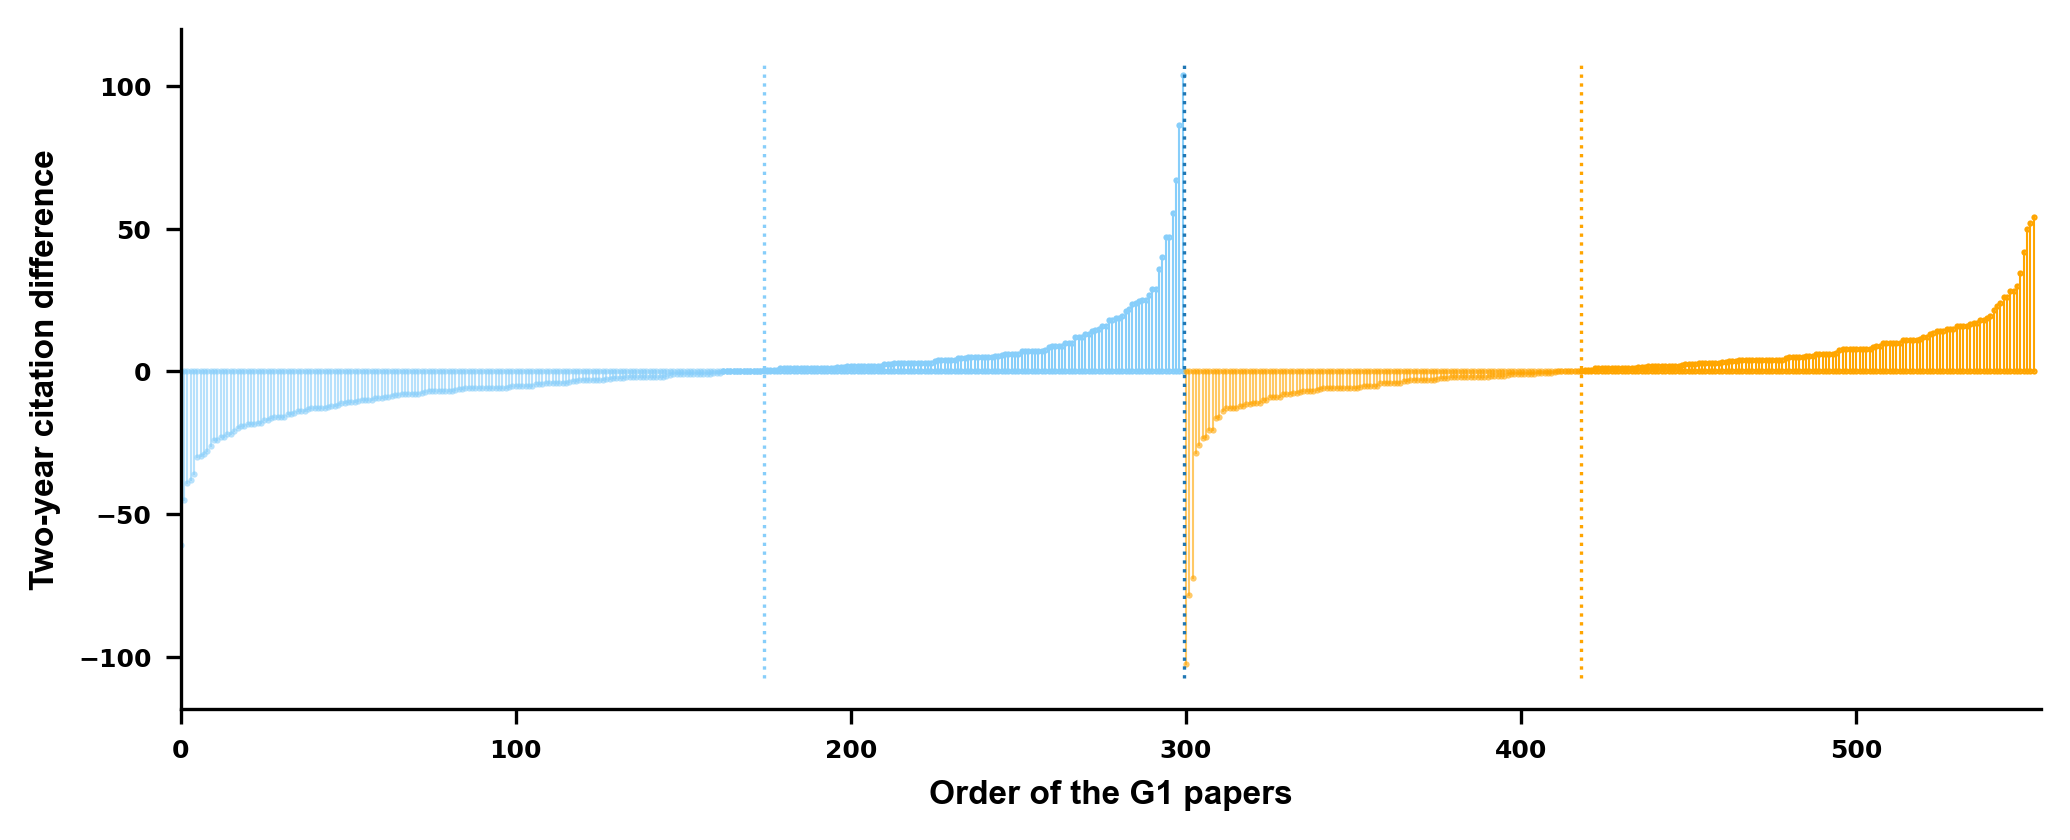

In [4]:
path=r'E:\citation_difference.csv'
citation_difference_df = pd.read_csv(path)


citation_difference_df = citation_difference_df.sort_values(by=["life_science_top_or_not","difference"]).reset_index()
data11=citation_difference_df[citation_difference_df['life_science_top_or_not']==1]
data111=data11[data11['difference']>0]
data112 = data11[data11['difference']<= 0]  

data12 = citation_difference_df[citation_difference_df['life_science_top_or_not'] ==0] #作者跳槽到排名更低的机构的样本
data121 = data12[data12['difference'] > 0]  
data122 = data12[data12['difference'] <= 0]  

plt.figure(figsize=(8,3),dpi=300)
ax = plt.gca()  
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(0,len(data12)+len(data11)+1)

for i, j in citation_difference_df.iterrows():
        x=[i,i]
        y = [0, j['difference']]
        if j['life_science_top_or_not']==1:
            if j['difference']>0:
                plt.plot(x,y,'orange',marker='.',linewidth=0.5, markersize=1) 
            if j['difference']<=0:
                plt.plot(x, y, 'orange',marker='.',linewidth=0.5,alpha=0.6, markersize=1)
            
        if j['life_science_top_or_not'] == 0:
            if j['difference'] >= 0:
                plt.plot(x, y, 'lightskyblue',marker='.', linewidth='0.5', markersize=1)
            if j['difference'] <0:
                plt.plot(x, y, 'lightskyblue', marker='.', linewidth='0.5', alpha=0.6, markersize=1)
  
plt.vlines(len(data12)-1+0.5, np.min(citation_difference_df['difference'])-5, np.max(citation_difference_df['difference'])+5, linestyles="dotted", linewidth=0.8)
plt.vlines(len(data122) - 1+0.5 + 0.5, np.min(citation_difference_df['difference'])-5, np.max(citation_difference_df['difference'])+5, linestyles="dotted", linewidth=0.8,colors='lightskyblue')
plt.vlines(len(data12)+len(data112) - 1 + 0.5 + 0.5, np.min(citation_difference_df['difference'])-5, np.max(citation_difference_df['difference'])+5, linestyles="dotted", linewidth=0.8,colors='orange')
  
    
plt.ylabel('Two-year citation difference',fontdict={'weight': 'bold', 'fontsize': 8,'family':'Arial'})
plt.xlabel('Order of the G1 papers',fontdict={'weight': 'bold', 'fontsize': 8,'family':'Arial'})

for y in range(len(ax.get_yticklabels()[:])):
        ax.get_yticklabels()[y].set_fontweight("bold")
        ax.get_yticklabels()[y].set_fontsize(6)
for x in range(len(ax.get_xticklabels()[:])):
        ax.get_xticklabels()[x].set_fontweight("bold")
        ax.get_xticklabels()[x].set_fontsize(6)  

plt.show()


## Distribution of the incremental percentages of citations for different ranking institutions before changing institutions

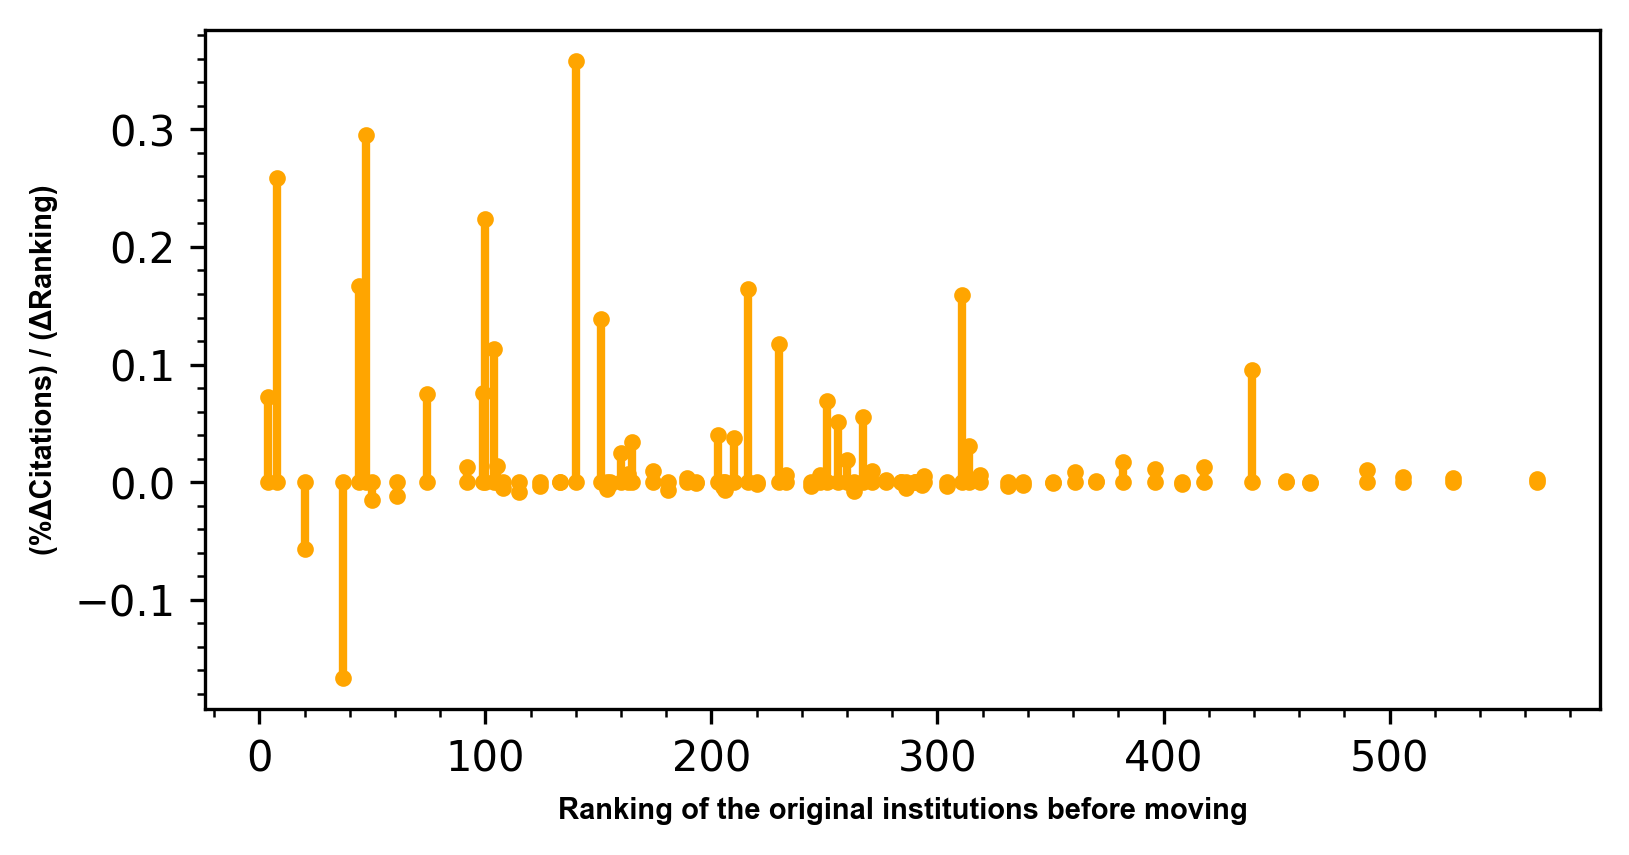

In [5]:
data = pd.read_csv(R'E:\incremental_percentages_of_citations_for_different_ranking_institutions.csv')
    

fig = plt.figure(figsize=(6,3),dpi=300)
ax = fig.add_subplot(111)

   
ax = plt.gca()
yminorLocator = AutoMinorLocator()
ax.yaxis.set_minor_locator(yminorLocator)
xminorLocator = AutoMinorLocator()
ax.xaxis.set_minor_locator(xminorLocator)

    
for i, j in data.iterrows():
        x = [j['from_NI_rank'],j['from_NI_rank']]
        y = [0,j['deta']]
        plt.plot(x, y, 'orange',  marker='.', linewidth='2')
plt.xlabel('Ranking of the original institutions before moving',fontdict={'weight': 'bold', 'fontsize': 7,'family':'Arial'})
plt.ylabel('(%ΔCitations) / (ΔRanking)',fontdict={'weight': 'bold', 'fontsize': 7,'family':'Arial'})
plt.show()